# MSADS 505 Final Project UE Wang

In [1]:
# import the neede packages:

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

import dmba
from dmba import classificationSummary, gainsChart, liftChart, stepwise_selection, regressionSummary,plotDecisionTree
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [2]:
loan_df = pd.read_csv('/Users/UE/Desktop/loan_approval_dataset.csv')
display(loan_df.shape)
loan_df.head()

(4269, 13)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loan_df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
# List all the column names in the DataFrame
print(loan_df.columns)

# Remove leading spaces from column names
loan_df.columns = loan_df.columns.str.strip()

print(loan_df.columns)

# Remove leading spaces from values
loan_df = loan_df.applymap(lambda x: x.strip() if type(x) == str else x)

loan_df.head()

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
display(loan_df['education'].value_counts())
display(loan_df['self_employed'].value_counts())

Graduate        2144
Not Graduate    2125
Name: education, dtype: int64

Yes    2150
No     2119
Name: self_employed, dtype: int64

In [6]:
# Replace values in the 'education' column
loan_df['education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
# Replace values in the 'self_employed' column
loan_df['self_employed'].replace({'Yes': 1, 'No': 0}, inplace=True)
# Replace values in the 'loan_status' column
loan_df['loan_status'].replace({'Approved': 1, 'Rejected': 0}, inplace=True)

In [7]:
display(loan_df['education'].value_counts())
display(loan_df['self_employed'].value_counts())
display(loan_df['loan_status'].value_counts())

1    2144
0    2125
Name: education, dtype: int64

1    2150
0    2119
Name: self_employed, dtype: int64

1    2656
0    1613
Name: loan_status, dtype: int64

In [8]:
# drop loan_id from the table
loan_df = loan_df.drop(['loan_id'], axis=1)
display(loan_df.head())

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [9]:
print(loan_df.shape)
print(loan_df.info())

(4269, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB
None


In [10]:
# Check the zero variance variables
# Get a list of column names

columns = loan_df.columns

# Initialize a list to store columns with zero variance
zero_variance_columns = []

# Iterate through the columns and check for zero variance
for column in columns:
    std_deviation = loan_df[column].std()
    if std_deviation == 0:
        zero_variance_columns.append(column)

# Print the columns with zero variance
if zero_variance_columns:
    print("Columns with zero variance:", zero_variance_columns)
else:
    print("No columns have zero variance.")

No columns have zero variance.


In [11]:
# The loan_status is the response variable; we will change it to the category.
loan_df['loan_status'] = loan_df['loan_status'].astype('category')

In [12]:
train, valid = train_test_split(loan_df, train_size=0.4, random_state=1)
print('Training   : ', train.shape)
print('Validation : ', valid.shape)

Training   :  (1707, 12)
Validation :  (2562, 12)


In [13]:
loan_df['no_of_dependents'].value_counts()

4    752
3    727
0    712
2    708
1    697
5    673
Name: no_of_dependents, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

continuous_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
                   'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Fit and transform the training data
train[continuous_cols] = scaler.fit_transform(train[continuous_cols])

# Transform the full dataset (including validation and test data)
Norm_loan_df = pd.DataFrame(scaler.transform(loan_df[continuous_cols]), columns=continuous_cols)

# Concatenate the scaled continuous columns with the original DataFrame
Norm_loan_df = pd.concat([Norm_loan_df, loan_df.drop(continuous_cols, axis=1)], axis=1)

# Split the data into trainNorm and validNorm
trainNorm = Norm_loan_df.iloc[train.index]
validNorm = Norm_loan_df.iloc[valid.index]

print('trainNorm   : ', trainNorm.shape)
print('validNorm : ', validNorm.shape)


trainNorm   :  (1707, 12)
validNorm :  (2562, 12)


In [15]:
 train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3434,5,1,1,0.007755,-0.024101,1.221544,-0.512894,0.711429,-0.554508,0.541753,-0.019747,0
59,4,0,1,0.186633,0.378034,0.870859,1.155351,-1.146229,-0.010295,0.409431,-0.050334,1
948,2,0,0,1.116801,0.411546,-0.882569,-1.306468,1.851000,1.191509,1.776751,0.897875,0
2726,4,1,1,-0.099573,-0.314532,-1.583940,-1.051598,-0.225206,0.737998,-0.208068,0.561414,0
3181,4,0,1,1.081025,1.863702,0.870859,0.958405,1.195356,0.874051,0.299163,1.203749,1


In [16]:
trainNorm = pd.get_dummies(trainNorm, columns=['education', 'self_employed'], drop_first=True)
validNorm = pd.get_dummies(validNorm, columns=['education', 'self_employed'], drop_first=True)

In [17]:
print('Training   : ', trainNorm.shape)
print('Validation : ', validNorm.shape)

Training   :  (1707, 12)
Validation :  (2562, 12)


In [18]:
trainNorm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 3434 to 235
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   income_annum              1707 non-null   float64 
 1   loan_amount               1707 non-null   float64 
 2   loan_term                 1707 non-null   float64 
 3   cibil_score               1707 non-null   float64 
 4   residential_assets_value  1707 non-null   float64 
 5   commercial_assets_value   1707 non-null   float64 
 6   luxury_assets_value       1707 non-null   float64 
 7   bank_asset_value          1707 non-null   float64 
 8   no_of_dependents          1707 non-null   int64   
 9   loan_status               1707 non-null   category
 10  education_1               1707 non-null   uint8   
 11  self_employed_1           1707 non-null   uint8   
dtypes: category(1), float64(8), int64(1), uint8(2)
memory usage: 138.5 KB


In [19]:
train_X = trainNorm.drop(columns='loan_status')
train_y = trainNorm['loan_status']

valid_X = validNorm.drop(columns='loan_status')
valid_y = validNorm['loan_status']

### Logistic Regression

In [20]:
logit = LogisticRegressionCV(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

print('regularization', logit.C_, '\n')
print('intercept ', logit.intercept_[0], '\n')

display(pd.DataFrame({'coeff': logit.coef_[0]}, index=train_X.columns).transpose())

print('\nAIC', AIC_score(valid_y, logit.predict(valid_X), df=len(train_X.columns) + 1), '\n')

regularization [0.35938137] 

intercept  1.3382043520560514 



,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,no_of_dependents,education_1,self_employed_1
coeff,-0.969168,1.035741,-0.816154,3.966698,0.085406,-0.003232,-0.098663,0.081105,0.04222,0.193374,0.016848



AIC 995.4744138766046 



In [21]:
# Confusion matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, logit.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, logit.predict(valid_X))

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9180)

       Prediction
Actual   0   1
     0 592  67
     1  73 975


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9145)

       Prediction
Actual    0    1
     0  844  110
     1  109 1499


### KNN

accuracy by k


,k,accuracy
0,1,0.853630
1,2,0.849727
2,3,0.882514
3,4,0.877440
4,5,0.889149
5,6,0.890710
6,7,0.893833
7,8,0.897346
8,9,0.902030
9,10,0.903201


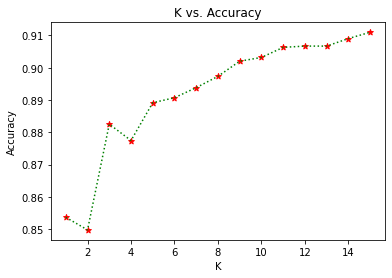

In [22]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

# Train a classifier for different values of k
results = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })
    
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print('accuracy by k')
display(results)

# show accuracy by k
plt.plot(results.k, results.accuracy, linestyle=':', c='green')
plt.title('K vs. Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

noteworthy_points = results[results['accuracy'] >= .8]
plt.scatter(noteworthy_points.k, noteworthy_points.accuracy, c='red', marker='*')

plt.show()

In [23]:
# using k=4 to re train the knn model
knn = KNeighborsClassifier(n_neighbors=15).fit(train_X, train_y)

# Classification Matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, knn.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, knn.predict(valid_X))

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9385)

       Prediction
Actual   0   1
     0 607  52
     1  53 995


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0  837  117
     1  111 1497


### Regression Tree

In [24]:
# GBM Model
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

# Classification Matrix
print('Test Confusion Matrix:\n')
classificationSummary(train_y, boost.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, boost.predict(valid_X))

Test Confusion Matrix:

Confusion Matrix (Accuracy 0.9994)

       Prediction
Actual    0    1
     0  658    1
     1    0 1048


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9731)

       Prediction
Actual    0    1
     0  922   32
     1   37 1571


### Decision Tree

Initial parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.002, 'min_samples_split': 8}


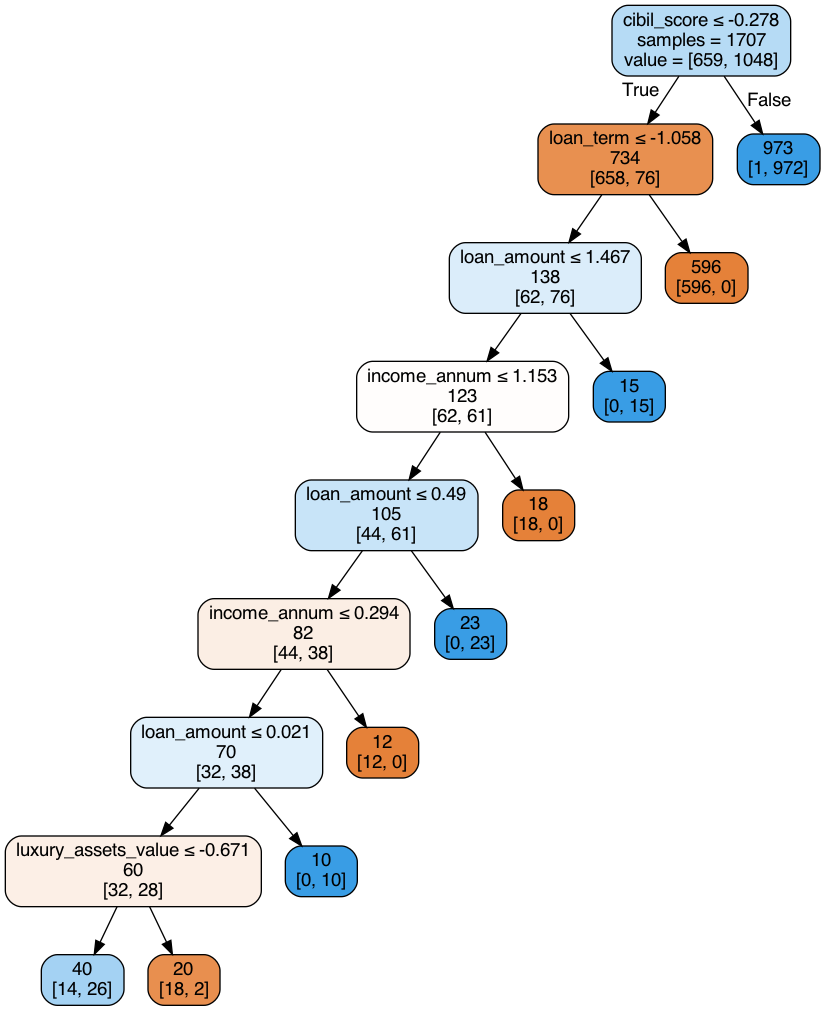

In [25]:
# user grid search to find optimized tree 
param_grid = {
                'max_depth': [5, 10, 15, 20, 25], 
                'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
                'min_samples_split': [5, 10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1) 
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

# use first grid search to find more optimal hyperparamters.
param_grid = {
                'max_depth': [15, 18, 20, 22, 25],
                'min_impurity_decrease': [0, 0.0005, 0.001, 0.0015, 0.002], 
                'min_samples_split': [8, 9, 10, 11, 12],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

print('Improved parameters: ', gridSearch.best_params_)

plotDecisionTree(gridSearch.best_estimator_, feature_names=train_X.columns)

In [26]:
# Confusion matrix
print('Training Confusion Matrix:\n')
classificationSummary(train_y, gridSearch.best_estimator_.predict(train_X))
print('\n\nValidation Confusion Matrix:\n')
classificationSummary(valid_y, gridSearch.best_estimator_.predict(valid_X))

Training Confusion Matrix:

Confusion Matrix (Accuracy 0.9900)

       Prediction
Actual    0    1
     0  644   15
     1    2 1046


Validation Confusion Matrix:

Confusion Matrix (Accuracy 0.9735)

       Prediction
Actual    0    1
     0  908   46
     1   22 1586


### Compare

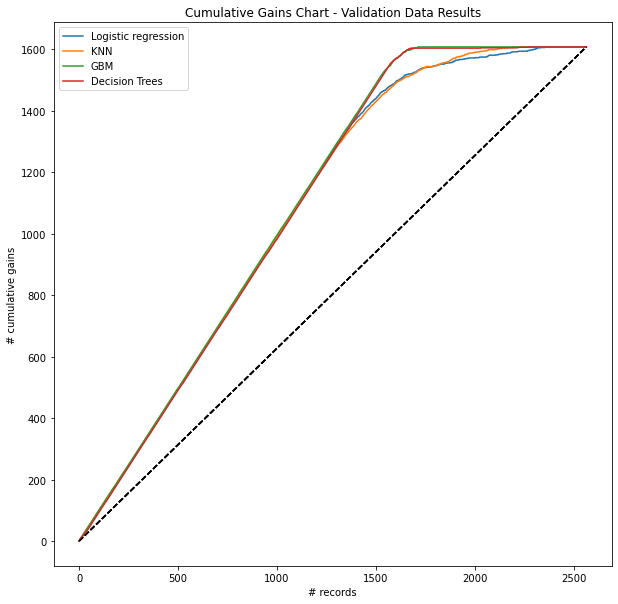

In [27]:

# Logistic regression

lg_proba =  logit.predict_proba(valid_X)
lg_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in lg_proba],
                            'p(1)': [p[1] for p in lg_proba],
                            'predicted': logit.predict(valid_X),
                          })
lg_result = lg_result.sort_values(by=['p(1)'], ascending=False)

# KNN

knn_tree_proba = knn.predict_proba(valid_X)
knn_tree_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in knn_tree_proba],
                            'p(1)': [p[1] for p in knn_tree_proba],
                            'predicted': knn.predict(valid_X),
                          })
knn_tree_result = knn_tree_result.sort_values(by=['p(1)'], ascending=False)

# Gradient Boosting

gbm_proba = boost.predict_proba(valid_X)
gbm_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in gbm_proba],
                            'p(1)': [p[1] for p in gbm_proba],
                            'predicted': boost.predict(valid_X),
                          })
gbm_result = gbm_result.sort_values(by=['p(1)'], ascending=False)
# Decision Trees

dec_tree_proba = gridSearch.best_estimator_.predict_proba(valid_X)
dec_tree_result = pd.DataFrame({'actual': valid_y.astype("int64"), 
                            'p(0)': [p[0] for p in dec_tree_proba],
                            'p(1)': [p[1] for p in dec_tree_proba],
                            'predicted': gridSearch.best_estimator_.predict(valid_X),
                          })
dec_tree_result = dec_tree_result.sort_values(by=['p(1)'], ascending=False)



ax = gainsChart(lg_result.actual, label='Logistic regression', color='C0', figsize=[10, 10])
ax = gainsChart(knn_tree_result.actual, label='KNN', color='C1', ax=ax)
ax = gainsChart(gbm_result.actual, label='GBM', color='C2', ax=ax)
ax = gainsChart(dec_tree_result.actual, label='Decision Trees', color='C3', ax=ax)

ax.legend()
ax.set_title('Cumulative Gains Chart - Validation Data Results')

plt.show()